In [1]:
import numpy as np

from commons import *
from dataset_loader import load_images, prepare_dataset
from IPython.display import display
import cv2
import pickle
import matplotlib.pyplot as plt
from keras.models import load_model


DOTS_SRC = 'hit-images-final3/dot'
TRACKS_SRC = 'hit-images-final3/line'
WORMS_SRC = 'hit-images-final3/worms'
ARTIFACTS_SRC = 'hit-images-final2/artefact'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'


# TODO: trzy klasy do kupy, wyznaczyć threshold. Pamiętać, że teraz liczność będzie 1:3, a nie 1:1
#       i wtedy sprawdzić jak ten próg odróżnia klasy
# TODO: przetestować metrykę samą w sobie dla dwóch obrazków
# TODO: zastosować metrykę KL z VAE w tym kodzie


dots_set =  prepare_dataset(load_images(DOTS_SRC))
worms_set =  prepare_dataset(load_images(WORMS_SRC))
tracks_set =  prepare_dataset(load_images(TRACKS_SRC))
artifacts_set =  prepare_dataset(load_images(ARTIFACTS_SRC))

dots_autoencoder = load_model(DOTS_AC)
worms_autoencoder = load_model(WORMS_AC)
tracks_autoencoder = load_model(TRACKS_AC)
artifacts_autoencoder = load_model(ARTIFACTS_AC)

on = {'dots': calc_similarity(dots_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'worms': calc_similarity(worms_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'tracks': calc_similarity(tracks_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'artifacts': calc_similarity(artifacts_autoencoder, dots_set, tracks_set, worms_set, artifacts_set)}

In [1]:
import numpy as np

from commons import *
from dataset_loader import load_images, prepare_dataset
from IPython.display import display
import cv2
import pickle
import matplotlib.pyplot as plt
from keras.models import load_model


DOTS_SRC = 'hit-images-final3/dot'
TRACKS_SRC = 'hit-images-final3/line'
WORMS_SRC = 'hit-images-final3/worms'
ARTIFACTS_SRC = 'hit-images-final2/artefact'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'


# TODO: trzy klasy do kupy, wyznaczyć threshold. Pamiętać, że teraz liczność będzie 1:3, a nie 1:1
#       i wtedy sprawdzić jak ten próg odróżnia klasy
# TODO: przetestować metrykę samą w sobie dla dwóch obrazków
# TODO: zastosować metrykę KL z VAE w tym kodzie


dots_set =  prepare_dataset(load_images(DOTS_SRC))
worms_set =  prepare_dataset(load_images(WORMS_SRC))
tracks_set =  prepare_dataset(load_images(TRACKS_SRC))
artifacts_set =  prepare_dataset(load_images(ARTIFACTS_SRC))

dots_autoencoder = load_model(DOTS_AC)
worms_autoencoder = load_model(WORMS_AC)
tracks_autoencoder = load_model(TRACKS_AC)
artifacts_autoencoder = load_model(ARTIFACTS_AC)

on = {'dots': calc_similarity(dots_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'worms': calc_similarity(worms_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'tracks': calc_similarity(tracks_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'artifacts': calc_similarity(artifacts_autoencoder, dots_set, tracks_set, worms_set, artifacts_set)}

Channel dots, compare dots vs tracks, threshold: -9.1333314705427, fp/fn percent: 1.202375778646965 %


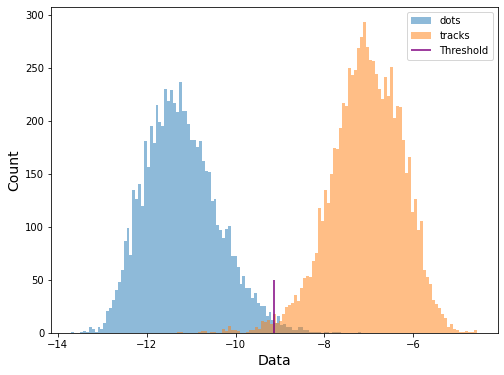

Channel dots, compare dots vs worms, threshold: -9.41025435239956, fp/fn percent: 2.3975083297117195 %


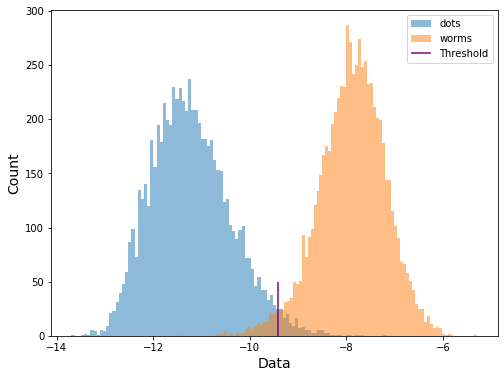

Channel dots, compare dots vs artifacts, threshold: -9.00370837425286, fp/fn percent: 1.0061919504643964 %


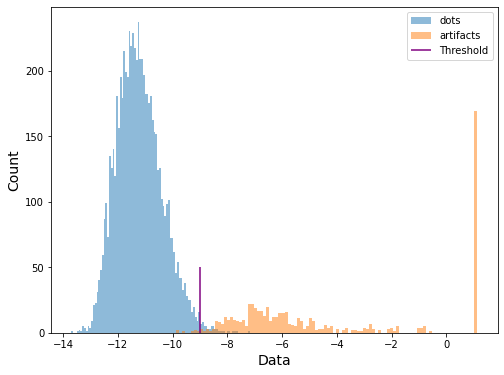

Channel tracks, compare tracks vs dots, threshold: -8.787644434847685, fp/fn percent: 0.6881066203100101 %


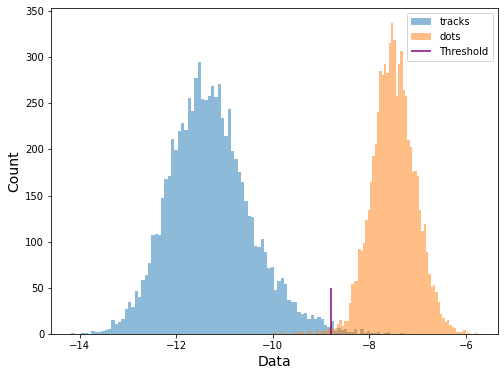

Channel tracks, compare tracks vs worms, threshold: -9.149543986298722, fp/fn percent: 1.609643424281796 %


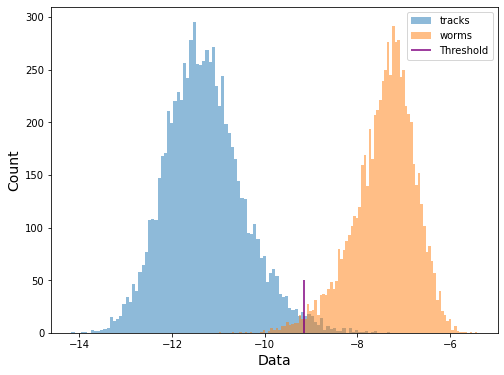

Channel tracks, compare tracks vs artifacts, threshold: -9.063683303532143, fp/fn percent: 1.4705882352941175 %


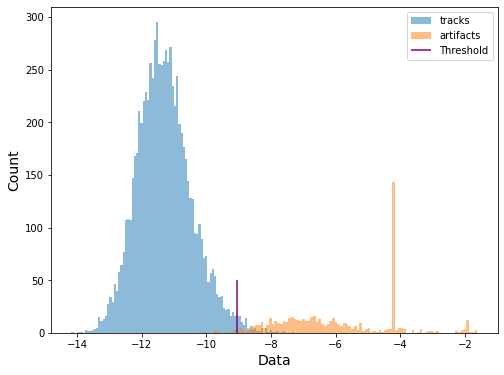

Channel worms, compare worms vs dots, threshold: -9.781590428362474, fp/fn percent: 47.175141242937855 %


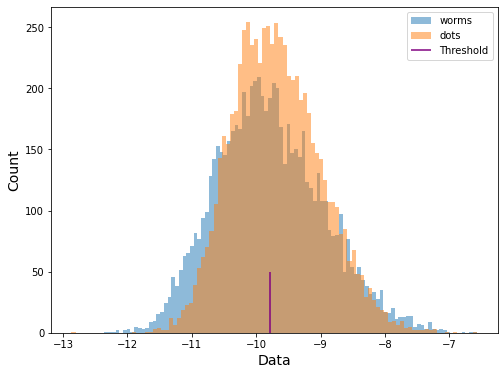

Channel worms, compare worms vs tracks, threshold: -9.454734147006857, fp/fn percent: 32.58986574274578 %


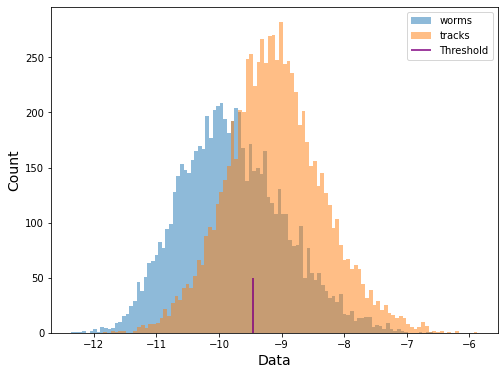

Channel worms, compare worms vs artifacts, threshold: -8.285749185671413, fp/fn percent: 4.489164086687306 %


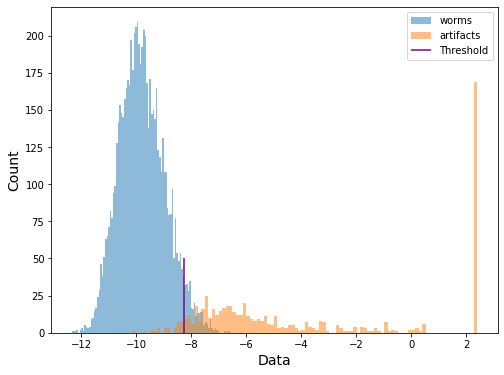

Channel artifacts, compare artifacts vs dots, threshold: -7.1484037081117755, fp/fn percent: 47.6780185758514 %


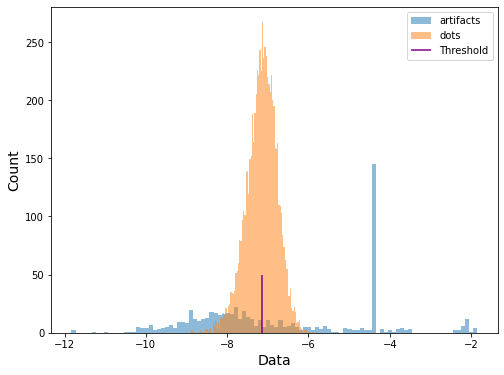

Channel artifacts, compare artifacts vs tracks, threshold: -7.464558886938161, fp/fn percent: 47.368421052631575 %


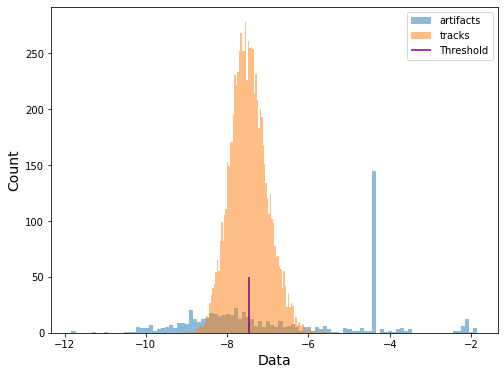

Channel artifacts, compare artifacts vs worms, threshold: -7.0966553719161, fp/fn percent: 47.05882352941176 %


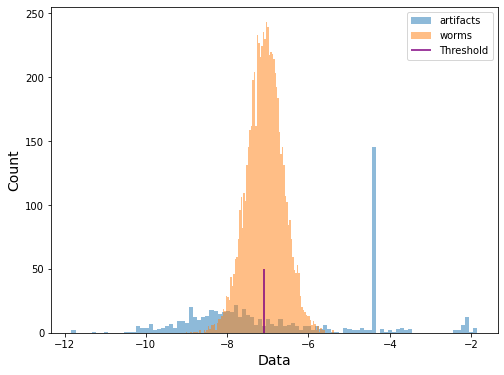

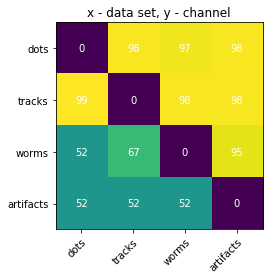

In [2]:
confusion_matrix(on)